# Forecasting the production of the milk in year 1974 & 1975

## Author : Rohan Kulkarni

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [29]:
milk=pd.read_csv(r'E:\Imarticus\11.TIME-SERIES\monthly_milk_production.csv')

In [30]:
milk

,Date,Production
0,1962-01,589
1,1962-02,561
2,1962-03,640
3,1962-04,656
4,1962-05,727
...,...,...
163,1975-08,858
164,1975-09,817
165,1975-10,827
166,1975-11,797


In [31]:
milk.isnull().sum()

Date          0
Production    0
dtype: int64

In [32]:
milk.Date=pd.to_datetime(milk.Date,infer_datetime_format=True)

In [33]:
milk=milk.set_index(['Date'])

In [34]:
milk

,Production
Date,
1962-01-01,589
1962-02-01,561
1962-03-01,640
1962-04-01,656
1962-05-01,727
...,...
1975-08-01,858
1975-09-01,817
1975-10-01,827


In [43]:
train=milk.iloc[:148,]
test=milk.iloc[148:,]

In [44]:
train

,Production
Date,
1962-01-01,589
1962-02-01,561
1962-03-01,640
1962-04-01,656
1962-05-01,727
...,...
1973-12-01,802
1974-01-01,828
1974-02-01,778


In [45]:
test.shape

(20, 1)

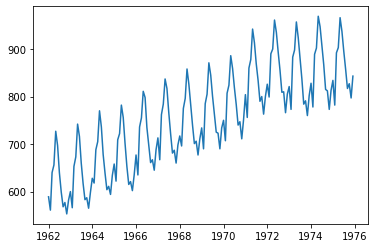

In [97]:
plt.plot(milk)

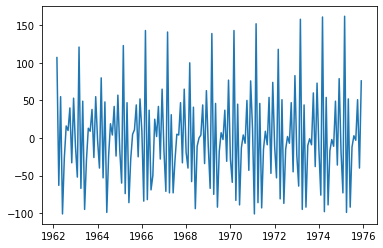

In [98]:
plt.plot(milk.diff().diff())

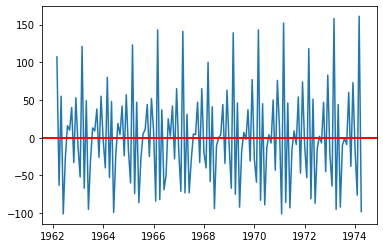

In [99]:
plt.plot(train.diff().diff())
plt.axhline(y=.10,color='r')
plt.axhline(y=0,color='r')
plt.axhline(y=-.10,color='r')

## Model

#### ACF & PACF

In [71]:
from statsmodels.tsa.stattools import acf,pacf
from statsmodels.tsa.arima_model import ARIMA

import pmdarima
from pmdarima import auto_arima
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [60]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

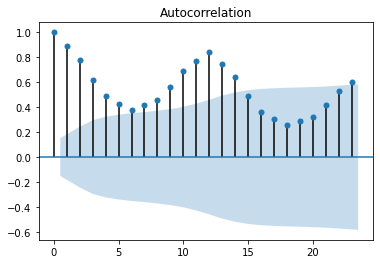

In [95]:
plot_acf(milk);

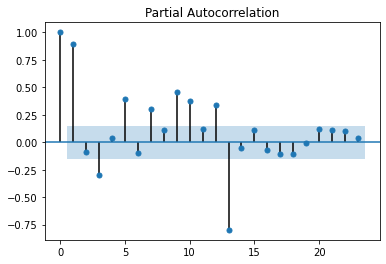

In [94]:
plot_pacf(milk);

In [100]:
auto_arima(milk['Production'],seasonal=True,m=12)

ARIMA(order=(2, 0, 0), scoring_args={}, seasonal_order=(0, 1, 1, 12),
      suppress_warnings=True)

In [101]:
model_sarima=SARIMAX(train['Production'],order=(2, 0, 0),seasonal_order=(0, 1, 1, 12))

C:\Users\_RoXstaR_\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [102]:
result=model_sarima.fit()

In [108]:
pred_result=result.predict(start=148,end=168)

In [109]:
pred_result

1974-05-01    963.185516
1974-06-01    933.602215
1974-07-01    890.356779
1974-08-01    849.799709
1974-09-01    802.426023
1974-10-01    807.634613
1974-11-01    772.377945
1974-12-01    812.198710
1975-01-01    837.312795
1975-02-01    792.604226
1975-03-01    897.310996
1975-04-01    911.384079
1975-05-01    972.193252
1975-06-01    942.630562
1975-07-01    899.297771
1975-08-01    858.683452
1975-09-01    811.244860
1975-10-01    816.391211
1975-11-01    781.072144
1975-12-01    820.831118
1976-01-01    845.883806
Freq: MS, dtype: float64

In [110]:
test

,Production
Date,
1974-05-01,969
1974-06-01,947
1974-07-01,908
1974-08-01,867
1974-09-01,815
1974-10-01,812
1974-11-01,773
1974-12-01,813
1975-01-01,834


In [111]:
error=test.Production - pred_result

In [112]:
error

1974-05-01     5.814484
1974-06-01    13.397785
1974-07-01    17.643221
1974-08-01    17.200291
1974-09-01    12.573977
1974-10-01     4.365387
1974-11-01     0.622055
1974-12-01     0.801290
1975-01-01    -3.312795
1975-02-01   -10.604226
1975-03-01    -5.310996
1975-04-01    -8.384079
1975-05-01    -6.193252
1975-06-01    -5.630562
1975-07-01    -3.297771
1975-08-01    -0.683452
1975-09-01     5.755140
1975-10-01    10.608789
1975-11-01    15.927856
1975-12-01    22.168882
1976-01-01          NaN
dtype: float64

In [113]:
MSE=np.mean(np.square(error))
MSE

109.639115075962

In [115]:
RMSE=np.sqrt(MSE)
RMSE

10.470869833779904

# So, as we can see the Forecasted milk production numbers are quite close.